<a href="https://colab.research.google.com/github/s2ul2/bitamin/blob/main/5week_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AutoEncoder 예제

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255

#정규화
X_test = X_test.astype(np.float32) / 255
# valid data는 5000개만 사용
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:] 
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
                                             keras.layers.Flatten(input_shape = [28, 28]),
                                             keras.layers.GaussianNoise(0.2),
                                             keras.layers.Dense(100, activation = 'relu'),
                                             keras.layers.Dense(30, activation = 'relu')
])

denoising_decoder = keras.models.Sequential([
                                             keras.layers.Dense(100, activation = 'relu', input_shape = [30]),
                                             keras.layers.Dense(28*28, activation = 'sigmoid'),
                                             keras.layers.Reshape([28, 28])
])

denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(learning_rate = 1.0))
history = denoising_ae.fit(X_train, X_train, epochs = 8,
                           validation_data = (X_valid, X_valid))

Epoch 1/8
1719/1719 [==============================] - 10s 4ms/step - loss: 0.3764 - val_loss: 0.3379
Epoch 2/8
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3198 - val_loss: 0.3213
Epoch 3/8
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3117 - val_loss: 0.3108
Epoch 4/8
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3065 - val_loss: 0.3029
Epoch 5/8
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3028 - val_loss: 0.2997
Epoch 6/8
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3000 - val_loss: 0.2993
Epoch 7/8
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2977 - val_loss: 0.2953
Epoch 8/8
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2960 - val_loss: 0.2943


In [6]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = denoising_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


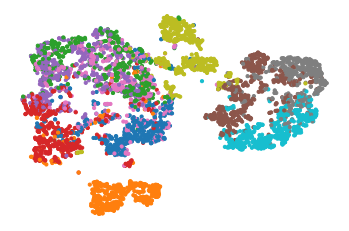

In [7]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c = y_valid, s = 10, cmap = 'tab10')
plt.axis('off')
plt.show()

# AutoEncoder 실습